In [67]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)


from collections import Counter


from sklearn import preprocessing

from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

from sklearn import metrics

from scipy.stats import sem, t
from scipy import mean

#Oversampling
# from imblearn.over_sampling import RandomOverSampler
# from kmeans_smote import KMeansSMOTE


### multiprocessing
from multiprocessing.pool import Pool

In [68]:
#load data
df = pd.read_csv('in-vehicle-coupon-recommendation.csv')

df.shape #lets check the dimensionality of the raw data

(12684, 26)

In [69]:
df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


# Data Exploration

In [70]:
#load the data to understand the attributes and data types
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [71]:
#data types
df.dtypes 

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

In [72]:
#change temperature into a category as its an ordinal datatype
df['temperature']=df['temperature'].astype('category')

In [73]:
df.dtypes

destination               object
passanger                 object
weather                   object
temperature             category
time                      object
coupon                    object
expiration                object
gender                    object
age                       object
maritalStatus             object
has_children               int64
education                 object
occupation                object
income                    object
car                       object
Bar                       object
CoffeeHouse               object
CarryAway                 object
RestaurantLessThan20      object
Restaurant20To50          object
toCoupon_GEQ5min           int64
toCoupon_GEQ15min          int64
toCoupon_GEQ25min          int64
direction_same             int64
direction_opp              int64
Y                          int64
dtype: object

# Cleaning The Data

In [74]:
#check for empty values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   destination           12684 non-null  object  
 1   passanger             12684 non-null  object  
 2   weather               12684 non-null  object  
 3   temperature           12684 non-null  category
 4   time                  12684 non-null  object  
 5   coupon                12684 non-null  object  
 6   expiration            12684 non-null  object  
 7   gender                12684 non-null  object  
 8   age                   12684 non-null  object  
 9   maritalStatus         12684 non-null  object  
 10  has_children          12684 non-null  int64   
 11  education             12684 non-null  object  
 12  occupation            12684 non-null  object  
 13  income                12684 non-null  object  
 14  car                   108 non-null    object  
 15  Ba

the 'car' variable has only 108 non-null values, more than 99% of the values are NaN. We can just drop it off

In [75]:
df["car"].value_counts()

Mazda5                                      22
do not drive                                22
Scooter and motorcycle                      22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64

In [76]:
df.drop('car', inplace=True, axis=1)

Empty values in categorical data can be removed or replaced with the most frequent value in each column.

In [77]:
for x in df.columns[df.isna().any()]:
    df = df.fillna({x: df[x].value_counts().idxmax()})

In [78]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [79]:
#change Object datatypes to Categorical datatypes)

df_obj = df.select_dtypes(include=['object']).copy()

for col in df_obj.columns:
    df[col]=df[col].astype('category')
    
df.dtypes

destination             category
passanger               category
weather                 category
temperature             category
time                    category
coupon                  category
expiration              category
gender                  category
age                     category
maritalStatus           category
has_children               int64
education               category
occupation              category
income                  category
Bar                     category
CoffeeHouse             category
CarryAway               category
RestaurantLessThan20    category
Restaurant20To50        category
toCoupon_GEQ5min           int64
toCoupon_GEQ15min          int64
toCoupon_GEQ25min          int64
direction_same             int64
direction_opp              int64
Y                          int64
dtype: object

In [80]:
#lets do some statistcal analysis
df.describe(include='all')

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684,12684,12684,12684.0,12684,12684,12684,12684,12684,12684,...,12684,12684,12684,12684,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
unique,3,4,3,3.0,5,5,2,2,8,5,...,5,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN
top,No Urgent Place,Alone,Sunny,80.0,6PM,Coffee House,1d,Female,21,Married partner,...,less1,1~3,1~3,less1,NaN,NaN,NaN,NaN,NaN,NaN
freq,6283,7305,10069,6528.0,3230,3996,7091,6511,2653,5100,...,3602,4823,5506,6266,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000


In [81]:
df.select_dtypes('int64').nunique()

has_children         2
toCoupon_GEQ5min     1
toCoupon_GEQ15min    2
toCoupon_GEQ25min    2
direction_same       2
direction_opp        2
Y                    2
dtype: int64

# preprocessing

From the decription above we can tell that 'toCoupon_GEQ5min' has only one unique variable,  Therefore, its better to drop that column.

In [82]:
df.drop(columns=['toCoupon_GEQ5min'], inplace=True)

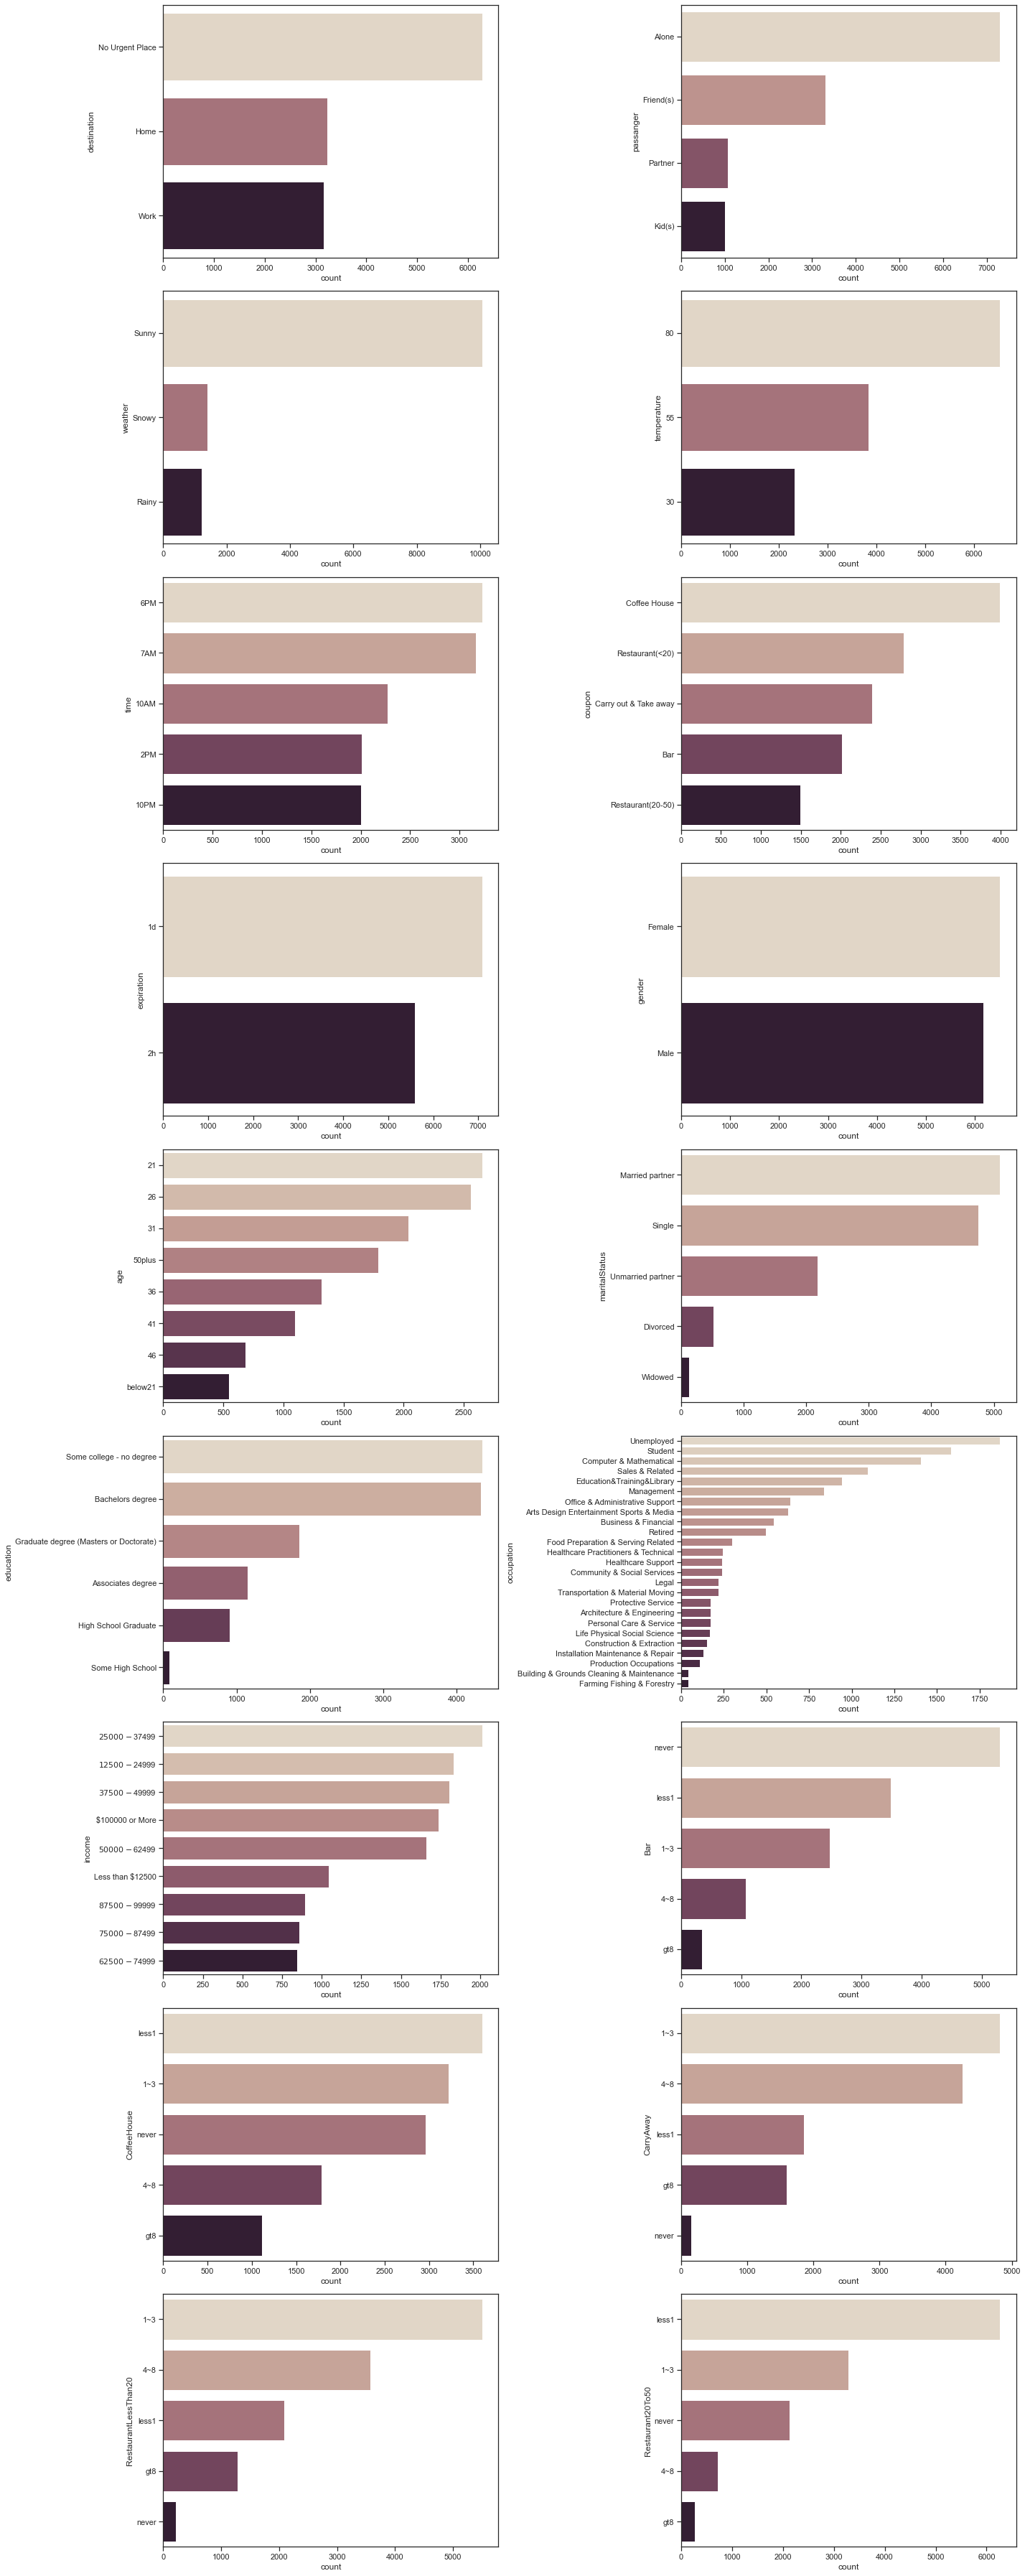

In [83]:
fig, axes = plt.subplots(9, 2, figsize=(20,50))
axes = axes.flatten()

for ax, col in zip(axes, df.select_dtypes('category').columns):
    sns.countplot(y=col, data=df, ax=ax, 
                  palette="ch:.25", order=df[col].value_counts().index);

plt.tight_layout()
plt.show()

**OneHotEncoder**

In [177]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

enc = OneHotEncoder(dtype='int64')

df_cat = df.select_dtypes(include=['category']).copy()
df_int = df.select_dtypes(include=['int64']).copy()

df_enc = pd.DataFrame()
for col in df_cat.columns:
    
    enc_results = enc.fit_transform(df_cat[[col]])

    enc_cat = [col + '_' + str(x) for x in enc.categories_[0]]

    df0 = pd.DataFrame(enc_results.toarray(), columns=enc_cat)

    df_enc = pd.concat([df_enc,df0], axis=1)
    
df_final = pd.concat([df_enc, df_int], axis=1)

df_final

,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,...,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,1
1,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,1,0,0,1,1
3,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,1,0,0,1,0
4,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,1
12680,0,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
12681,0,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
12682,0,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,1,0


In [178]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_final, test_size=.2,\
                           random_state=42,\
                           shuffle=True, stratify=df_final['Y'])

**Feature importance**

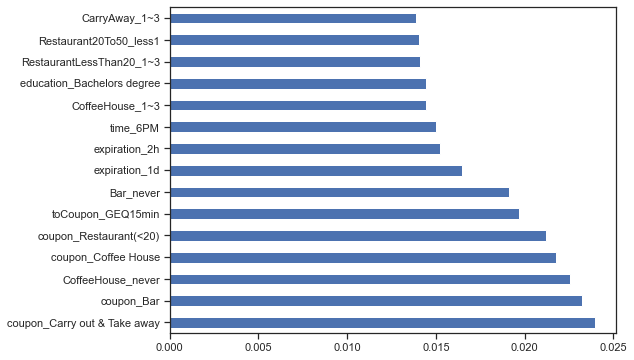

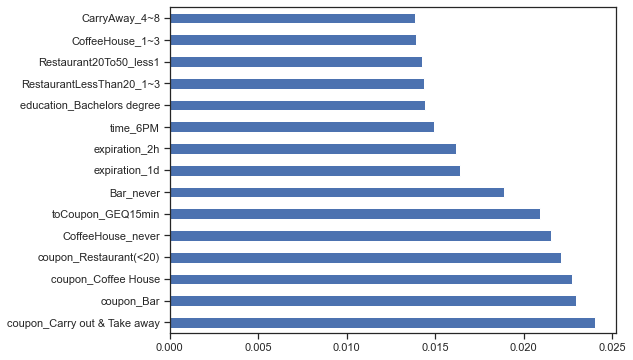

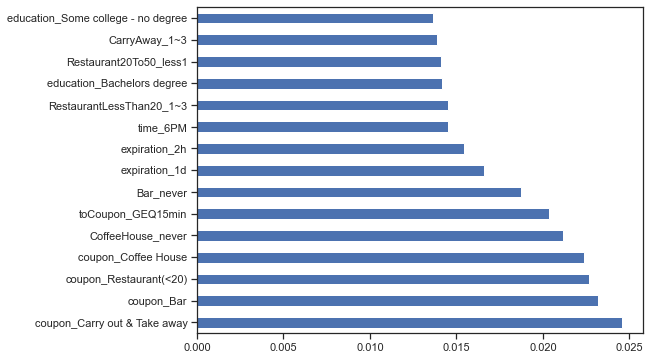

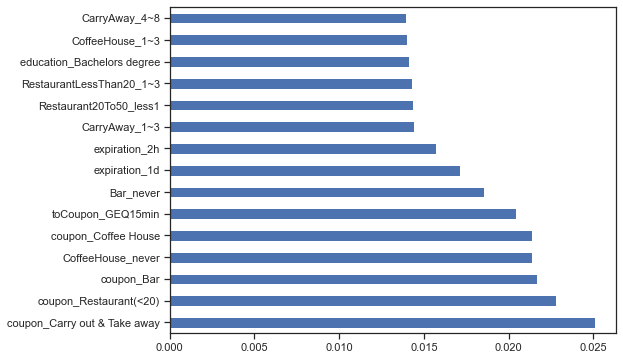

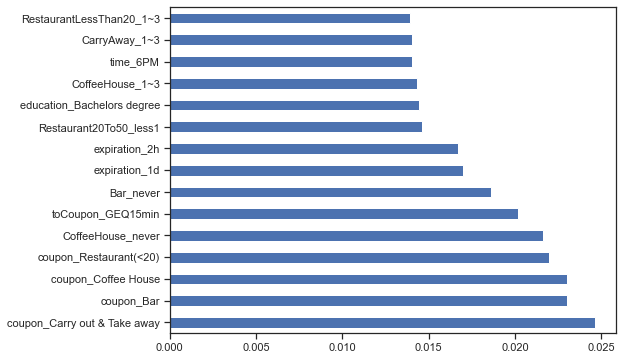

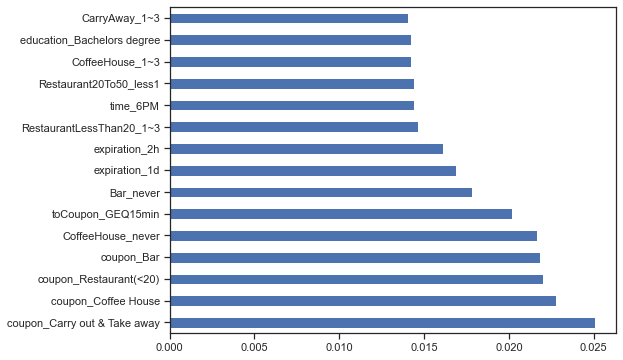

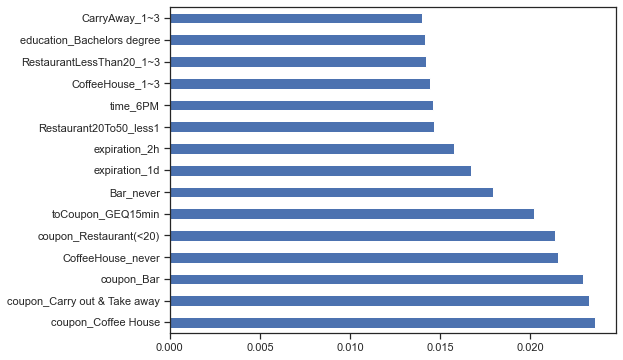

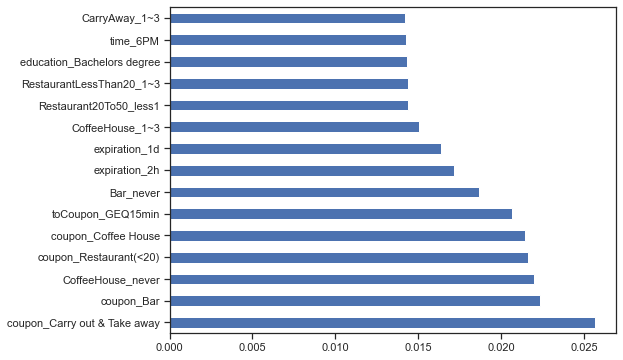

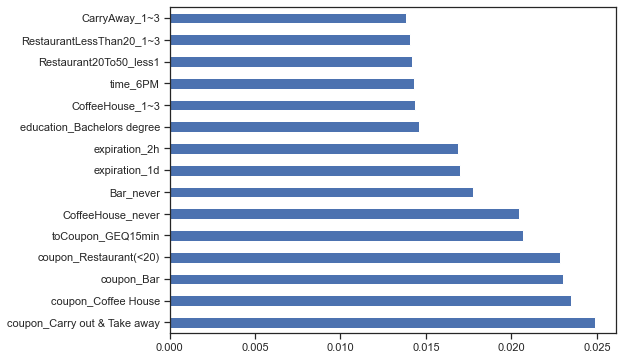

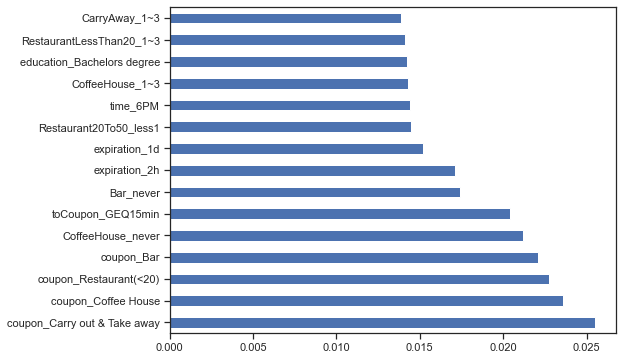

In [179]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html

from sklearn.ensemble import ExtraTreesClassifier
importances = dict()
for col in train_set.iloc[:,:-1].columns:
    importances[col] = 0

for i in range(10):
    model = ExtraTreesClassifier()
    model.fit(train_set.iloc[:,:-1], train_set.iloc[:,-1])
    matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)
#     print(model.feature_importances_)
#     plot graph of feature importances for better visualization

    feat_importances = pd.Series(model.feature_importances_, index=train_set.iloc[:,:-1].columns)
    for col in train_set.iloc[:,:-1].columns:
        importances[col] += dict(feat_importances)[col]
    feat_importances.nlargest(15).plot(kind='barh')
    plt.show()

newpd = pd.DataFrame()
for col in train_set.iloc[:,:-1].columns:
    newpd[col] = list([importances[col]])
newpd.to_csv('feature_importamce.csv', index=False)

**Oversampleing**

In [180]:
count = Counter(df_final.iloc[:,-1])
count

Counter({1: 7210, 0: 5474})

we have enough samples in each category, thus we do not need to use oversampling methods.

# Tuning

In [182]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html
max_abs_scaler = preprocessing.MaxAbsScaler()
train_set = pd.DataFrame(max_abs_scaler.fit_transform(train_set))